# Insurance Purchase Prediction
### Part II - Machine Learning Models and Evaluation

## Group 3: Vivek | Gurunathan C | Gnana CP

In [1]:
# as pd/np/plt gives the library other name which makes it easy for coders to call the library again 
# using shortened given names

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn import metrics, model_selection
from sklearn.metrics import plot_roc_curve



In [2]:
# Loading the test from CSV into a data frame

df = pd.read_csv('../data/train_cleaned_1.csv')


In [3]:
df

,Unnamed: 0,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0,10000000.0,1.0,0.0,0,8.0,10,0,2.0,0.0,...,1.0,2.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,633.0
1,1,10000000.0,2.0,0.0,0,8.0,10,0,2.0,0.0,...,1.0,2.0,1.0,0.0,2.0,2.0,1.0,2.0,1.0,630.0
2,2,10000000.0,3.0,0.0,0,8.0,10,0,2.0,0.0,...,1.0,2.0,1.0,0.0,2.0,2.0,1.0,2.0,1.0,630.0
3,3,10000000.0,4.0,0.0,0,8.0,10,0,2.0,0.0,...,1.0,2.0,1.0,0.0,2.0,2.0,1.0,2.0,1.0,630.0
4,4,10000000.0,5.0,0.0,0,11.0,10,0,2.0,0.0,...,1.0,2.0,1.0,0.0,2.0,2.0,1.0,2.0,1.0,630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665244,665244,10152724.0,2.0,0.0,3,13.0,12,203,1.0,1.0,...,1.0,4.0,1.0,0.0,2.0,3.0,0.0,2.0,2.0,677.0
665245,665245,10152724.0,3.0,0.0,3,13.0,12,203,1.0,1.0,...,1.0,4.0,1.0,0.0,2.0,3.0,0.0,2.0,2.0,677.0
665246,665246,10152724.0,4.0,0.0,3,13.0,12,203,1.0,1.0,...,1.0,4.0,1.0,0.0,2.0,3.0,0.0,2.0,2.0,677.0
665247,665247,10152724.0,5.0,0.0,3,13.0,12,203,1.0,1.0,...,1.0,4.0,1.0,0.0,2.0,3.0,0.0,2.0,2.0,685.0


In [5]:
# dropping the first column as that is just the index from file

df.drop(df.columns[0], axis = 1, inplace=True)

In [6]:
df['day'] = df['day'].astype('category')

df['location'] = df['location'].astype('category')

df['state'] = df['state'].astype('category')

df['car_value'] = df['car_value'].astype('category')


In [7]:
# "Cleaning": combining rare categories 
# To get the intuition let’s examine the column State and Car age


df['car_age'].value_counts().nlargest(30)

1.0     71650
2.0     50389
7.0     46752
8.0     44453
6.0     44363
9.0     44218
4.0     40991
3.0     40391
10.0    39301
11.0    36173
5.0     32806
12.0    32113
13.0    26628
14.0    25026
15.0    19041
16.0    14888
17.0    11370
18.0     8280
19.0     7415
0.0      5805
20.0     5219
21.0     3717
22.0     2730
23.0     2314
24.0     1738
25.0     1444
26.0     1071
27.0      823
28.0      688
29.0      622
Name: car_age, dtype: int64

In [8]:
df['state'].value_counts()

6     106287
23     91627
27     60677
24     44537
13     28443
10     25295
32     25188
2      24409
0      23560
3      19353
30     18099
12     16100
22     15459
15     15243
26     15068
31     14820
25     13779
16     10722
1      10460
33     10103
7       8802
20      7988
14      6800
21      6790
9       6110
28      5887
11      5585
34      5053
8       4545
5       4101
4       3748
17      3332
19      3121
18      2487
35      1163
29       508
Name: state, dtype: int64

In [10]:
# interested in top 20 states frequency of their presence in the column, as they have at least 10 k records

need_state = df['state'].value_counts().index[:20]

# interested in top 17 car age frequency of their presence in the column, as they have at least 10 k records

need_car_age = df['car_age'].value_counts().index[:17]

#look at the newly created dataframe
need_state

need_car_age


Float64Index([ 1.0,  2.0,  7.0,  8.0,  6.0,  9.0,  4.0,  3.0, 10.0, 11.0,  5.0,
              12.0, 13.0, 14.0, 15.0, 16.0, 17.0],
             dtype='float64')

In [11]:
# Let us use np.where function replace the infrequent states to '20'

df['state'] = np.where(df['state'].isin(need_state), df['state'], '20') 

#let’s check the result
df['state'].value_counts()

6     106287
23     91627
20     76020
27     60677
24     44537
13     28443
10     25295
32     25188
2      24409
0      23560
3      19353
30     18099
12     16100
22     15459
15     15243
26     15068
31     14820
25     13779
16     10722
1      10460
33     10103
Name: state, dtype: int64

In [12]:
df['car_age'] = np.where(df['car_age'].isin(need_car_age), df['car_age'], '18') 

#let’s check the result
df['car_age'].value_counts()

1.0     71650
2.0     50389
7.0     46752
18      44696
8.0     44453
6.0     44363
9.0     44218
4.0     40991
3.0     40391
10.0    39301
11.0    36173
5.0     32806
12.0    32113
13.0    26628
14.0    25026
15.0    19041
16.0    14888
17.0    11370
Name: car_age, dtype: int64

In [13]:
#Defining the vector of target (y) and matrix of features (X)

y = df['record_type']
X = df.drop(columns = 'record_type')

In [14]:
# Setting a random seed
np.random.seed(7777)

# split the data randomly into 80% train and 20% test samples 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)

# Decision Tree

In [15]:
# Importing libraries

from sklearn.tree import DecisionTreeClassifier

In [16]:
# Define a CART model and call it classifier_DT
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=77300)

# Train the model classifier_DT on the training data
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=77300)

In [17]:
classifier_DT.score(X_test, y_test)

0.8674107478391582

In [18]:
#Let us use the model for predicting values for traing and testing data
ytrain_pred = classifier_DT.predict(X_train)
ytest_pred = classifier_DT.predict(X_test)

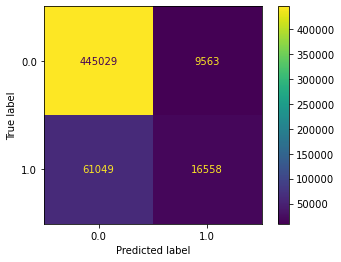

In [20]:
#let us plot the confusion matrix for both training and testing data

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier_DT, X_train, y_train) 

In [57]:
# Defining a generic function to calculate Accuracy, Error Rate, sensitivity, specifivity, precision

def func_calculate_accuracy (model_name, TP, TN, FP, FN):

    Pa = TP + FN
    Na = TN + FP

    if (Pa+Na) > 0:
        accuracy = round (((TP+TN) / (Pa+Na)),4)
        error_rate = round (((FP+FN) / (Pa+Na)), 4)
    else:
        accuracy = "undefined"
        error_rate  = "undefined"
    
    if Pa > 0:
        sensitivity = round( (TP / Pa), 4)
    else:
        sensitivity = "undefined"
        
    if Na > 0:
        specifivity = round ((TN / Na), 4)
    else:
        specifivity = "undefined"
    
    if TP+FP > 0:
        precision = round ((TP / (TP+FP)), 4)
    else:
        precision = "undefined"
     
    #print ("Accuracy = ([ (TP+TN) / (Pa+Na) ]")
    print(model_name, " : Accuracy = ", accuracy, "\n")

    # print ("Error Rate = [ (FP+FN) / (Pa+Na) ]") 
    print(model_name, " : Error Rate = ", error_rate, "\n")
    
    # print ("Sensitivity = [ TP / Pa ]")
    print(model_name, " : Sensitivity = ", sensitivity, "\n")
    
    # print ("Specifivity = [ TN / Na ]")
    print(model_name, " : Specifivity = ", specifivity, "\n")
    
    # print ("Precision = [ TP / (TP+FP) ]")
    print(model_name, " : Precision = ", precision, "\n")
    
    return

In [58]:
func_calculate_accuracy ("Decision Tree",16558,445029,9563,61049 )

Decision Tree  : Accuracy =  0.8673 

Decision Tree  : Error Rate =  0.1327 

Decision Tree  : Sensitivity =  0.2134 

Decision Tree  : Specifivity =  0.979 

Decision Tree  : Precision =  0.6339 



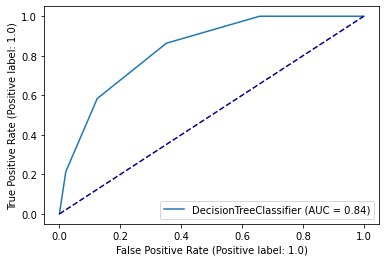

In [30]:
# Plot ROC curve

metrics.plot_roc_curve(classifier_DT, X_test, y_test)
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")

In [34]:
param_grid_DT = {
    'max_leaf_nodes':[5,10,15]
}

In [35]:
# Run the search. Note: the parameter n_jobs is to define how many CPU cores from your computer to use 
# (-1 is for all the cores available). The cv is the number of splits for cross-validation.
from sklearn.model_selection import GridSearchCV

classifier_DT_hp = GridSearchCV(classifier_DT, param_grid_DT, n_jobs=-1, cv=5)
classifier_DT_hp.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_leaf_nodes=5,
                                              random_state=77300),
             n_jobs=-1, param_grid={'max_leaf_nodes': [5, 10, 15]})

In [37]:
print("Best suggested params from Hyperparameter tuning for Decision Tree, are: ", classifier_DT_hp.best_params_) 

Best suggested params from Hyperparameter tuning for Decision Tree, are:  {'max_leaf_nodes': 15}


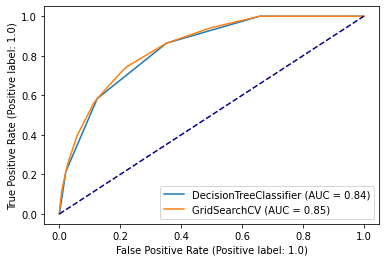

In [38]:
from sklearn import metrics, model_selection
# Importing roc curve plot from sklearn
from sklearn.metrics import plot_roc_curve

# Create a multiple roc plot for various models
metric_hp = metrics.plot_roc_curve(classifier_DT, X_test, y_test)
plot_roc_curve(classifier_DT_hp, X_test, y_test, ax= metric_hp.ax_)
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")

CART tree with 5 leafs


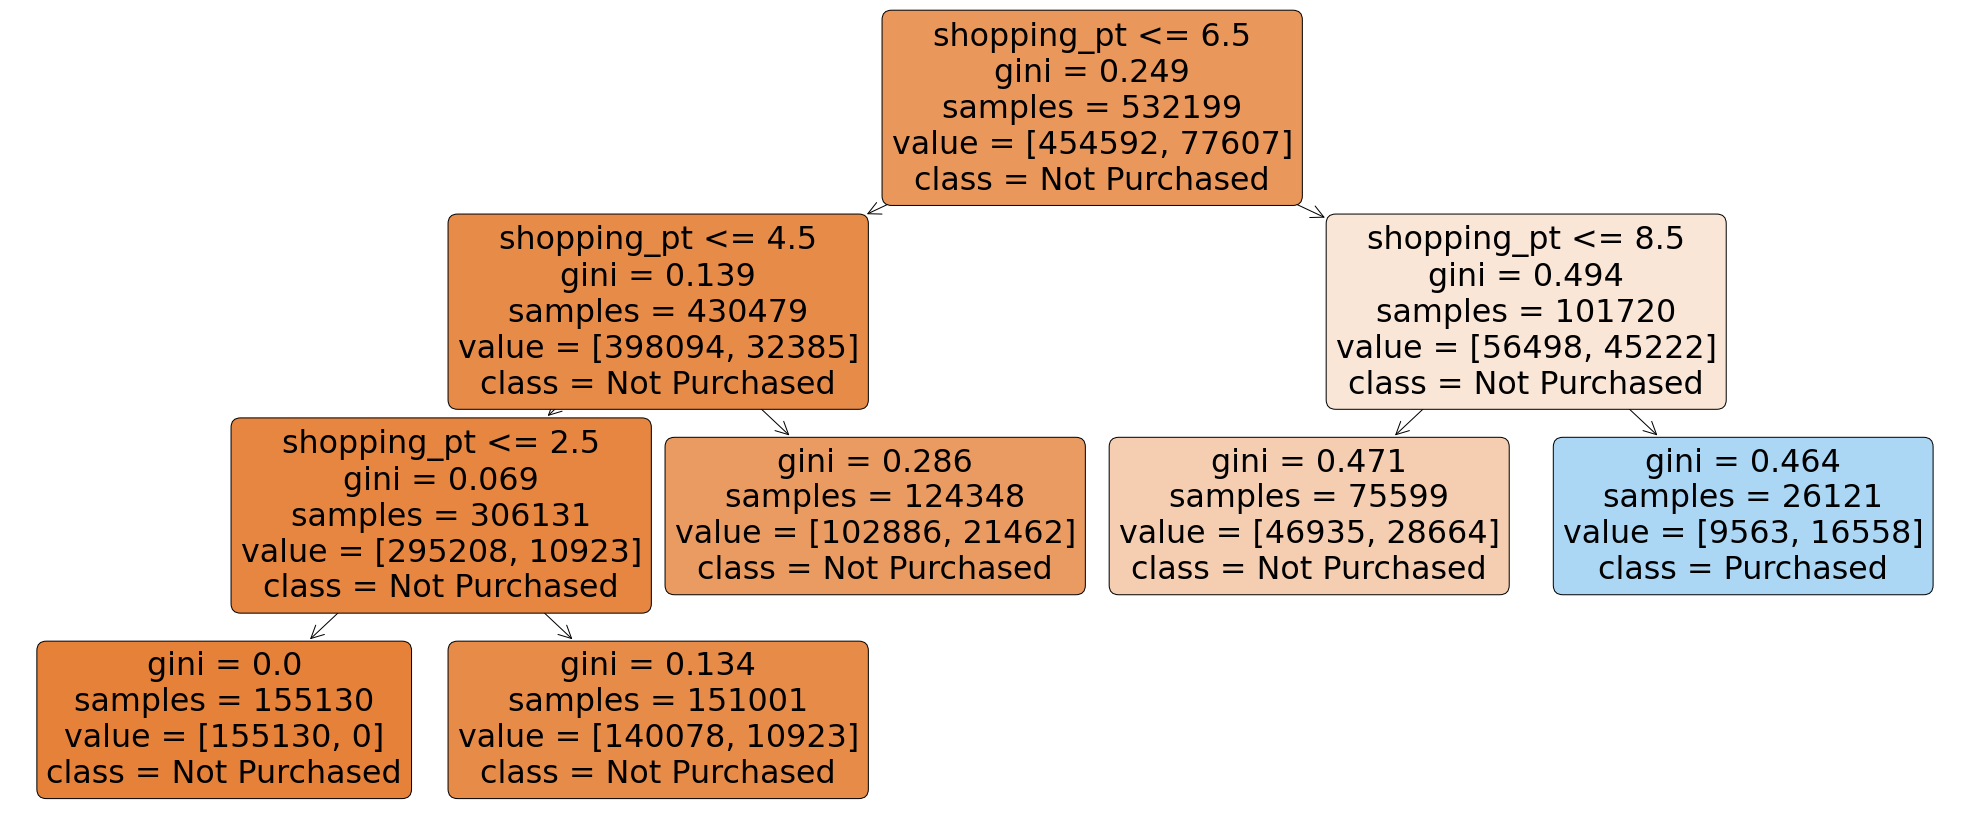

In [39]:
# Visualizing the resultant tree

from sklearn import tree

plt.figure(figsize=(35,15))
tree.plot_tree(classifier_DT.fit(X_train, y_train), feature_names = X_train.columns, filled = True, 
               class_names = ['Not Purchased', 'Purchased'], rounded = True)
print('CART tree with 5 leafs')

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
%matplotlib inline

In [48]:
# Define a CART model and call it classifier_DT
classifier_LR = LogisticRegression(random_state=7777,max_iter=10000) # random_state -same as before

# Train the model classifier_DT on the training data
classifier_LR.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=7777)

In [49]:
#Let us use the model for predicting values for traing and testing data
ytrain_pred_LR = classifier_LR.predict(X_train)
ytest_pred_LR = classifier_LR.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [50]:
classifier_LR.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.8541751221345358

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


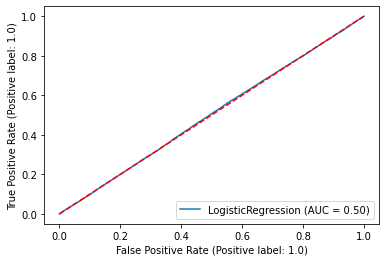

In [51]:
from sklearn import metrics, model_selection
metrics.plot_roc_curve(classifier_LR, X_test, y_test)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


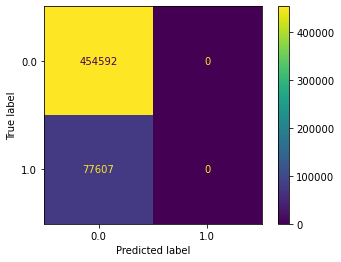

In [52]:
#let us plot the confusion matrix for both training and testing data

plot_confusion_matrix(classifier_LR, X_train, y_train) 

In [59]:
func_calculate_accuracy ("Logistic Regression",0,454592,0,77607)

Logistic Regression  : Accuracy =  0.8542 

Logistic Regression  : Error Rate =  0.1458 

Logistic Regression  : Sensitivity =  0.0 

Logistic Regression  : Specifivity =  1.0 

Logistic Regression  : Precision =  undefined 



# Neural Network

Standardizing Training and Test Data for NN

In [61]:
# To train a neural network, the data should always be scaled because it is very sensitive to it.
from sklearn.preprocessing import StandardScaler

In [63]:
# define standardizaion function and call it scaler. Look at the documentation for StandardScaler()
scaler = StandardScaler()

In [64]:
# Fit only to the training data that means taking the mean and standard deviation from training data only
scaler.fit(X_train)

StandardScaler()

In [68]:
# Now apply the transformations to the data:
X_train_NN = scaler.transform(X_train)
X_test_NN = scaler.transform(X_test)

y_train_NN = y_train
y_test_NN = y_test

In [66]:
# Import MLP Classifier from sklearn
from sklearn.neural_network import MLPClassifier

In [69]:
# Define a multi-layer network also know as multi-layer perceptron (MLP) and call it mlp_NN # random_state -same as before

mlp_NN = MLPClassifier(hidden_layer_sizes=(10,10),max_iter = 2000, activation='relu', solver='sgd', random_state=7777) 


# Train the model mlp on the training data
mlp_NN.fit(X_train_NN,y_train_NN)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=7777,
              solver='sgd')

#### Evaluation of NN 

In [70]:
#Let us use the model for predicting values for traing and testing data
ytrg_pred_NN = mlp_NN.predict(X_train_NN)
ytest_pred_NN = mlp_NN.predict(X_test_NN)

In [75]:
# Now get the accuracy score
from sklearn.metrics import accuracy_score

training_score_NN = accuracy_score(y_train_NN, ytrg_pred_NN )
test_score_NN = accuracy_score(y_test_NN, ytest_pred_NN )

# training accuracy score
print ("training accuracy score for NN: ", round (training_score_NN, 4)) # 100 pecent accuracy means overfitting

print ("test accuracy score for NN: ", round (test_score_NN, 4))

training accuracy score for NN:  0.8673
test accuracy score for NN:  0.8674


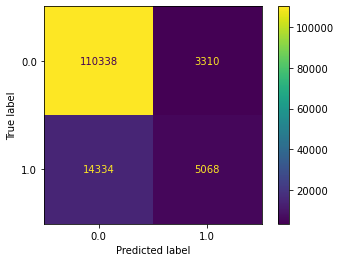

In [76]:
#let us plot the confusion matrix for both training and testing data
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlp_NN,  X_test_NN, y_test_NN)  

In [78]:
func_calculate_accuracy ("Neural Network (train)", 5068, 110338, 3310, 14334)

Neural Network (train)  : Accuracy =  0.8674 

Neural Network (train)  : Error Rate =  0.1326 

Neural Network (train)  : Sensitivity =  0.2612 

Neural Network (train)  : Specifivity =  0.9709 

Neural Network (train)  : Precision =  0.6049 



In [1]:
plot_confusion_matrix(mlp_NN,  X_train_NN, y_train_NN)  

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
func_calculate_accuracy ("Neural Network (train)", 5068, 110338, 3310, 14334)

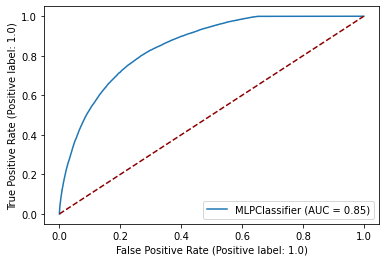

In [79]:
# Plotting RoC curve

plot_roc_curve(mlp_NN, X_test_NN, y_test_NN)

plt.plot([0, 1], [0, 1], color="darkred", linestyle="--")

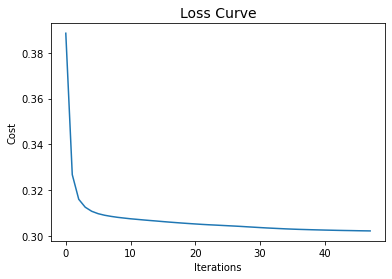

In [80]:
# Let us see how error is decreasing with training iterations using the LOSS CURVE

plt.plot(mlp_NN.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

#### Hyperparameter Tuning for NN

In [81]:
# define a new MLP classifier and call it mlpo
mlp_hp_NN = MLPClassifier(hidden_layer_sizes=(10,10),max_iter = 2000, solver='sgd', random_state=7777)

In [85]:
#Define a hyper-parameter space to search. (All the values that you want to try out.)
param_grid_NN = {
    'hidden_layer_sizes': [(5,5),(15,15)],
    'max_iter': [1500, 3000],
    'activation': ['logistic','relu'],
}

In [86]:
# Run the search. Note: the parameter n_jobs is to define how many CPU cores from your computer to use 
# (-1 is for all the cores available). The cv is the number of splits for cross-validation.
from sklearn.model_selection import GridSearchCV

mlpot = GridSearchCV(mlp_hp_NN, param_grid_NN, n_jobs=-1, cv=5)
mlpot.fit(X_train_NN,y_train_NN)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000,
                                     random_state=7777, solver='sgd'),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(5, 5), (15, 15)],
                         'max_iter': [1500, 3000]})

In [88]:
print("Best suggested params from Hyperparameter tuning for NN are: ", mlpot.best_params_) 

Best suggested params from Hyperparameter tuning for NN are:  {'activation': 'relu', 'hidden_layer_sizes': (15, 15), 'max_iter': 1500}


In [90]:
#Let us use the model for predicting values for traing and testing data
ytest_pred_mlpot_NN = mlpot.predict(X_test_NN)

In [92]:
# Now get the accuracy score
test_score_mlpot_NN = accuracy_score(y_test_NN,ytest_pred_mlpot_NN )

In [93]:
# Print all the test scores
print ("test accuracy score for NN: ", round (test_score_NN, 4))
print ("test accuracy score for NN (post Tuning): ", round (test_score_mlpot_NN, 4))

test accuracy score for NN:  0.8674
test accuracy score for NN (post Tuning):  0.8679


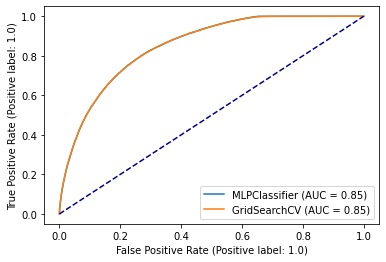

In [94]:
# Create a multiple roc plot for various models
disp= plot_roc_curve(mlp_NN, X_test_NN, y_test_NN)
plot_roc_curve(mlpot, X_test_NN, y_test_NN, ax= disp.ax_)
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


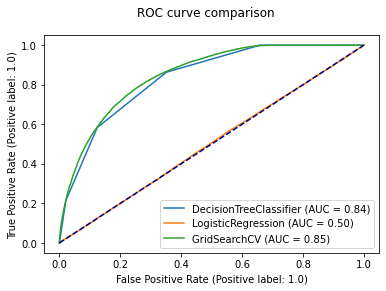

In [95]:
from sklearn import metrics, model_selection
roc_dt=metrics.plot_roc_curve(classifier_DT, X_test, y_test)
roc_lr=metrics.plot_roc_curve(classifier_LR, X_test, y_test,ax=roc_dt.ax_)
roc_nn=metrics.plot_roc_curve(mlpot, X_test_NN, y_test_NN,ax=roc_dt.ax_)

roc_lr.figure_.suptitle("ROC curve comparison")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")